In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

In [50]:
data = pd.read_csv('DHHNGSP.csv')
data.head()

,DATE,DHHNGSP
0,2019-09-24,2.55
1,2019-09-25,2.54
2,2019-09-26,2.57
3,2019-09-27,2.41
4,2019-09-30,2.37


In [51]:
data.tail(10)

,DATE,DHHNGSP
1302,2024-09-11,2.13
1303,2024-09-12,2.13
1304,2024-09-13,2.25
1305,2024-09-16,2.23
1306,2024-09-17,2.33
1307,2024-09-18,2.31
1308,2024-09-19,2.24
1309,2024-09-20,2.2
1310,2024-09-23,2.4
1311,2024-09-24,2.61


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     1312 non-null   object
 1   DHHNGSP  1312 non-null   object
dtypes: object(2)
memory usage: 20.6+ KB


#### The  data type of DCOILWTICO is object. We need to change it to numeric.

In [53]:
data['DHHNGSP'] = pd.to_numeric(data['DHHNGSP'], errors='coerce')

C:\Users\SaiCharan Ritwik\Downloads\ANACONDA\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='DHHNGSP', ylabel='Density'>

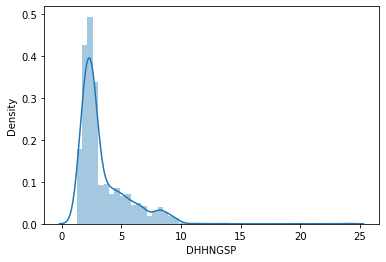

In [54]:
sns.distplot(data['DHHNGSP'])

#### Drop rows with missing values.

In [55]:
data = data.dropna()

In [56]:
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.sort_values('DATE')

#### Calculating daily returns.

In [57]:
data['Daily_Return'] = data['DHHNGSP'].pct_change()

In [58]:
data = data.dropna()

#### Statistics of daily return.

In [59]:
mean_return = data['Daily_Return'].mean()
mean_return

0.005091711101033254

In [60]:
std_return = data['Daily_Return'].std()
std_return

0.12385027477322329

### Simulation.

In [61]:
current_price = data['DHHNGSP'].iloc[-1]    # The latest price of crude oil.
trading_days = 1
simulations = 1000                           # Number of Monte Carlo simulations.

In [62]:
np.random.seed(42)
simulated_prices = np.zeros((simulations, trading_days))

In [63]:
for i in range(simulations):
    daily_returns = np.random.normal(mean_return, std_return, trading_days)
    price_path = current_price * np.exp(np.cumsum(daily_returns))
    simulated_prices[i, :] = price_path

In [64]:
final_prices = simulated_prices[:, -1]

In [65]:
mean_predicted_price = np.mean(final_prices)
median_predicted_price = np.median(final_prices)
lower_bound = np.percentile(final_prices, 5)
upper_bound = np.percentile(final_prices, 95)

mean_predicted_price, median_predicted_price, lower_bound, upper_bound

(2.649095071228585, 2.63155631257882, 2.1715735873388464, 3.2288804996650815)